In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from IPython.display import display

## Load real estate purchases

In [2]:
data_path = "/Users/nacim/Projects/statistics/data.csv"

In [3]:
data_df = pd.read_csv(data_path)
data_df

,ID,Building,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price,Status,Customer ID,...,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,1030,1,2005.0,11.0,Apartment,30,743,246173,Sold,C0028,...,1986.0,6.0,21.0,F,USA,California,Home,5.0,No,Website
1,1029,1,2005.0,10.0,Apartment,29,756,246332,Sold,C0027,...,1983.0,2.0,24.0,F,USA,California,Home,5.0,No,Website
2,2002,2,2007.0,7.0,Apartment,2,587,209281,Sold,C0112,...,1985.0,12.0,27.0,M,USA,California,Home,1.0,Yes,Client
3,2031,2,2007.0,12.0,Apartment,31,1605,452667,Sold,C0160,...,1985.0,12.0,27.0,M,USA,California,Investment,3.0,Yes,Website
4,1049,1,2004.0,11.0,Apartment,49,1375,467083,Sold,C0014,...,1979.0,5.0,15.0,F,USA,California,Home,4.0,No,Agency
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,5044,5,NaN,NaN,Apartment,44,1239,322611,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,5047,5,NaN,NaN,Apartment,47,795,279191,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,5048,5,NaN,NaN,Apartment,48,1013,287997,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,5050,5,NaN,NaN,Apartment,50,1075,365869,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
display(data_df.columns.to_list())

['ID',
 'Building',
 'Year of sale',
 'Month of sale',
 'Type of property',
 'Property #',
 'Area (ft.)',
 'Price',
 'Status',
 'Customer ID',
 'Entity',
 'Name',
 'Surname',
 'Age at time of purchase',
 'Interval',
 'Y',
 'M',
 'D',
 'Gender',
 'Country',
 'State',
 'Purpose',
 'Deal satisfaction',
 'Mortgage',
 'Source']

## Rename columns

In [5]:
# Rename column name

data_df.columns = [column_name.lower().replace(' ', '_') for column_name in data_df.columns]
display(data_df)

,id,building,year_of_sale,month_of_sale,type_of_property,property_#,area_(ft.),price,status,customer_id,...,y,m,d,gender,country,state,purpose,deal_satisfaction,mortgage,source
0,1030,1,2005.0,11.0,Apartment,30,743,246173,Sold,C0028,...,1986.0,6.0,21.0,F,USA,California,Home,5.0,No,Website
1,1029,1,2005.0,10.0,Apartment,29,756,246332,Sold,C0027,...,1983.0,2.0,24.0,F,USA,California,Home,5.0,No,Website
2,2002,2,2007.0,7.0,Apartment,2,587,209281,Sold,C0112,...,1985.0,12.0,27.0,M,USA,California,Home,1.0,Yes,Client
3,2031,2,2007.0,12.0,Apartment,31,1605,452667,Sold,C0160,...,1985.0,12.0,27.0,M,USA,California,Investment,3.0,Yes,Website
4,1049,1,2004.0,11.0,Apartment,49,1375,467083,Sold,C0014,...,1979.0,5.0,15.0,F,USA,California,Home,4.0,No,Agency
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,5044,5,NaN,NaN,Apartment,44,1239,322611,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,5047,5,NaN,NaN,Apartment,47,795,279191,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,5048,5,NaN,NaN,Apartment,48,1013,287997,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,5050,5,NaN,NaN,Apartment,50,1075,365869,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Gender exploration

In [6]:
# Gender - Frequency distribution table

gender_df = data_df.groupby(by='gender', dropna=False) \
                          .size() \
                          .to_frame('frequency')

gender_df.index = gender_df.index.fillna('N/D')

gender_df

,frequency
gender,
F,70
M,108
N/D,89


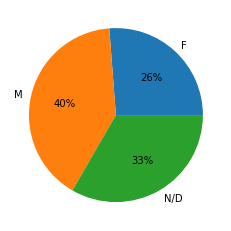

In [7]:
plt.pie(gender_df['frequency'], labels=gender_df.index, autopct='%.0f%%')
plt.show()

## US States exploration

In [8]:
# us states - Frequency distribution table

us_state_df = data_df.groupby(['state']) \
                         .size() \
                         .sort_values(ascending=False) \
                         .to_frame('frequency')

us_state_df['cum_percentage'] = round(us_state_df['frequency'].cumsum() / us_state_df['frequency'].sum() * 100, 2)

us_state_df

,frequency,cum_percentage
state,,
California,119,65.75
Nevada,17,75.14
Arizona,11,81.22
Colorado,11,87.29
Oregon,11,93.37
Utah,6,96.69
Virginia,4,98.90
Kansas,1,99.45
Wyoming,1,100.00


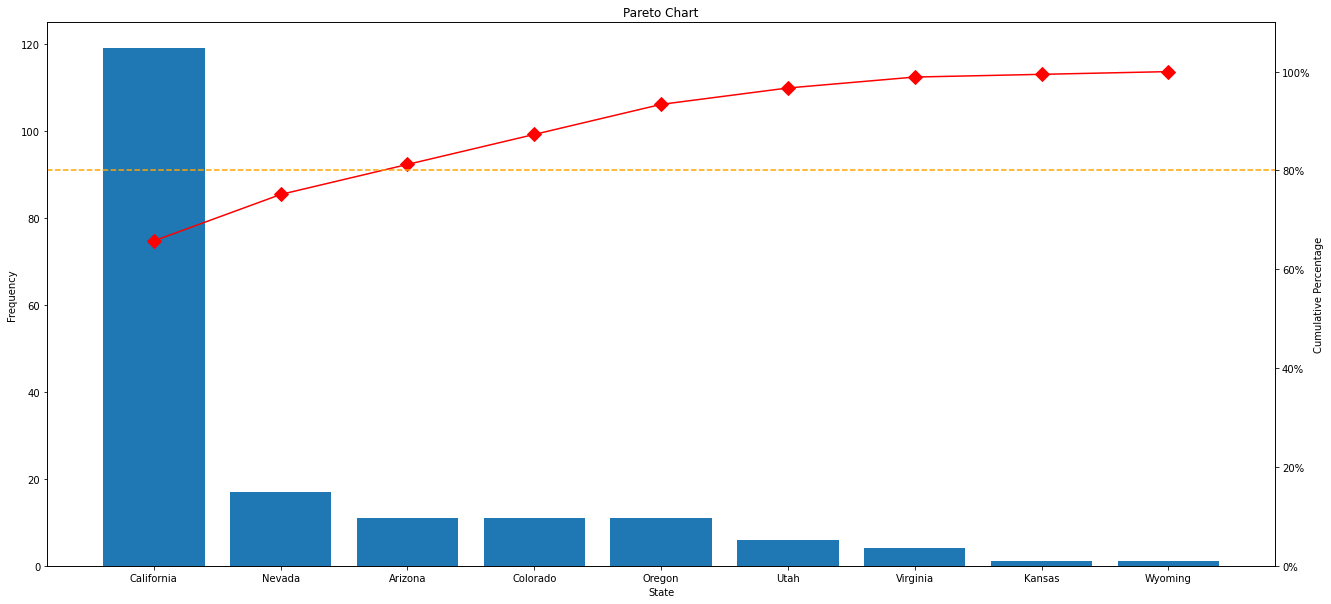

In [9]:
# Set figure and axis
fig, ax = plt.subplots(figsize=(22,10))

# Plot bars (i.e. frequencies)
ax.bar(us_state_df.index, us_state_df["frequency"])
ax.set_title("Pareto Chart")
ax.set_xlabel("State")
ax.set_ylabel("Frequency");

# Second y axis (i.e. cumulative percentage)
ax2 = ax.twinx()
ax2.plot(us_state_df.index, us_state_df["cum_percentage"], color="red", marker="D", ms=10)
ax2.axhline(80, color="orange", linestyle="dashed")
ax2.set_ylim(0, 110)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylabel("Cumulative Percentage");

plt.show()

## Age exploration

In [10]:
age_df = data_df.groupby(by='age_at_time_of_purchase') \
                .size() \
                .to_frame('frequency') \
                .sort_index(ascending=True)

age_df.index = age_df.index.fillna(0)

age_df

,frequency
age_at_time_of_purchase,
,1
19,1
22,3
25,1
26,4
27,2
28,1
29,5
30,3


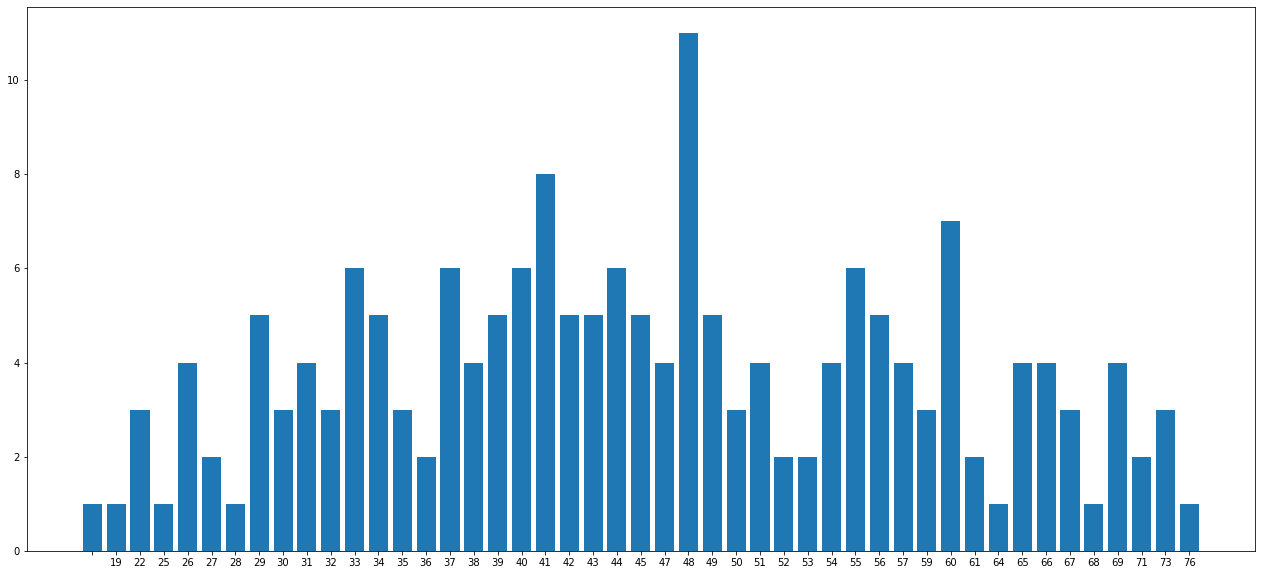

In [11]:
f, ax = plt.subplots(figsize=(22,10)) # set the size that you'd like (width, height)

ax.bar(age_df.index, age_df['frequency'])

plt.show()

In [12]:
age_interval_df = data_df.groupby(by='interval', dropna=True) \
                .size() \
                .to_frame('frequency') \
                .sort_index(ascending=True)

age_interval_df

,frequency
interval,
18-25,5
26-35,36
36-45,52
46-55,41
56-65,26
65+,18


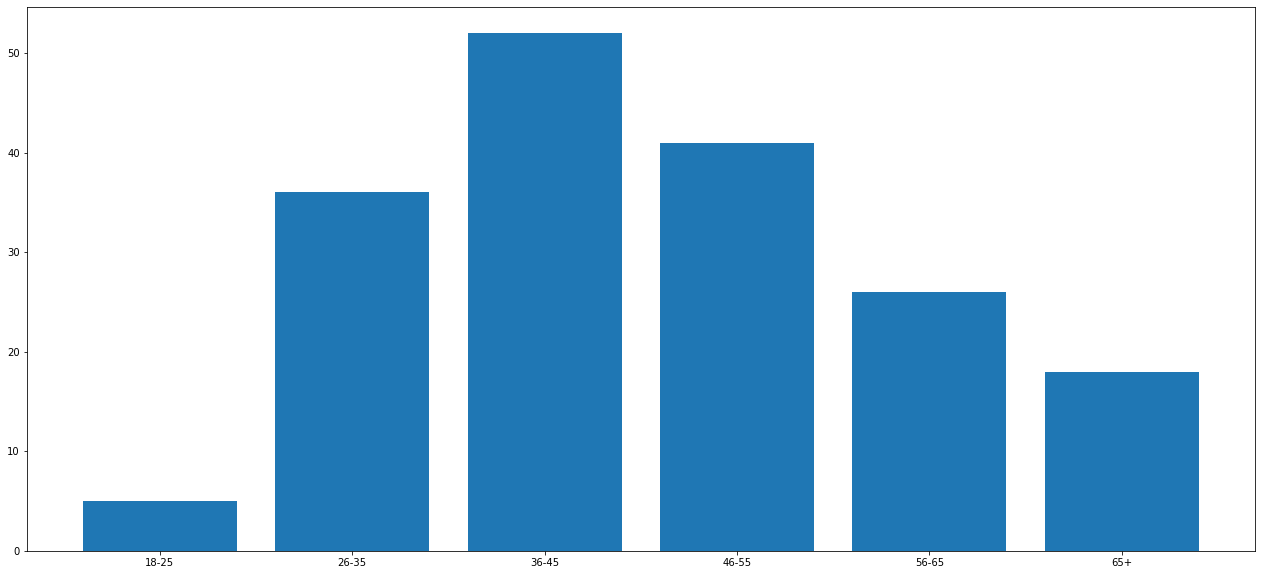

In [13]:
f, ax = plt.subplots(figsize=(22,10)) # set the size that you'd like (width, height)

ax.bar(age_interval_df.index, age_interval_df['frequency'])

plt.show()

## Finding linear relationship between age and price

The correlation coefficient (p) measures the strenght of the relationship between 2 variables A and B.

If:

    p < 0 => negative linear relationship between A and B. (A = xB + y with x < 0)
    p = 0 => A and B are linearly independant.
    p > 0 => positive linear relationship between A and B. (A = xB + y with x > 0)

In [63]:
df = data_df[['age_at_time_of_purchase', 'price']].copy()

# Cast to numeric values
df['age_at_time_of_purchase'] = pd.to_numeric(df['age_at_time_of_purchase'], downcast='float', errors='coerce')
df['price'] = pd.to_numeric(df['price'], downcast='float', errors='coerce')

# Remove NaN rows for numerical stability
df = df.dropna()

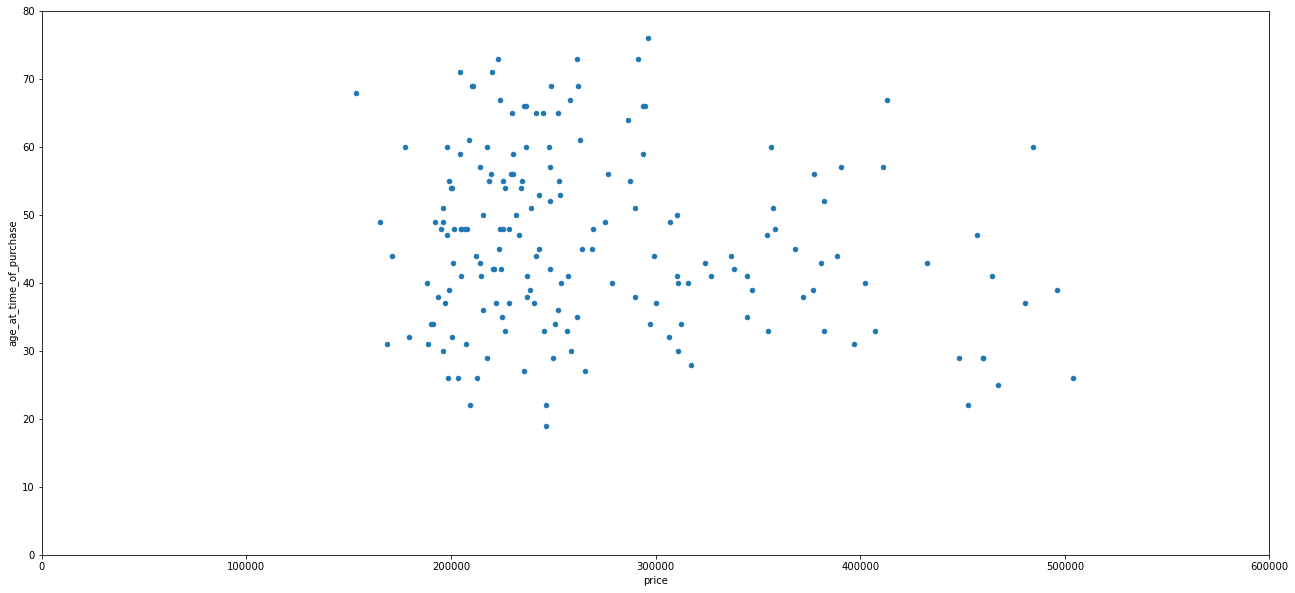

In [72]:
ax = df.plot.scatter('price', 'age_at_time_of_purchase', figsize=(22,10))
ax.set_xlim(0, 600000)
ax.set_ylim(0, 80)
plt.show()

In [64]:
# Compute Pearson correlation
display(df.corr())

,age_at_time_of_purchase,price
age_at_time_of_purchase,1.000000,-0.174894
price,-0.174894,1.000000
